# <strong>Financial Time Series (Chatper 6)
시계열 분석

In [1]:
# New Functions
# np.polyfit() : 오류가 가장 적은 직선의 기울기, 절편을 찾아준다

<br>
## <strong>1 Pandas 로 데이터 다루기
DataFrame : table data
### <strong>01 Pandas 기초
DataFrame : table data
1. <strong>.ix</strong> is deprecated. Please use <strong>(는 거의 안쓴다....)</strong>
1. <strong>.loc</strong> for label based indexing : <strong>index 레이블</strong>을 기준으로 분할
1. <strong>.iloc</strong> for positional indexing : <strong>index 주소값</strong>을 기준으로 분할

In [2]:
# .loc()
import pandas as pd
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
print(df.loc['c'],          '\n')
print(df.loc[['a', 'd']],   '\n') # 인덱스 주소값으로 선택
print(df.loc[df.index[0:4]],'\n') # 인덱스 주소값으로 선택
print(df.sum())                   # 컬럼별 총합을 출력

numbers    30
Name: c, dtype: int64 

   numbers
a       10
d       40 

   numbers
a       10
b       20
c       30
d       40 

numbers    100
dtype: int64


In [3]:
# 모든 cell에 일괄함수 적용하기
df.apply(lambda x: x ** 2)  

,numbers
a,100
b,400
c,900
d,1600


In [4]:
# 사칙연산은 lambda 안쓰고도 가능
df ** 2  

,numbers
a,100
b,400
c,900
d,1600


In [5]:
# 새로운 컬럼을 추가
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df['names']  = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
          ignore_index=True)                # 일시적 index 추가

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [6]:
# df.append() : row 추가시, index도 함께 변경
df = df.append( pd.DataFrame({
    'numbers': 100, 'floats': 5.75,'names': 'Henry'}, index=['z',])); df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [7]:
# 이미 존재하는 index를 기준으로 데이터가 수정
df.join( pd.DataFrame([1, 4, 9, 16, 25],
         index=['a', 'b', 'c', 'd', 'z'], columns=['squares',]))

,floats,names,numbers,squares
a,1.50,Guido,10,1
b,2.50,Felix,20,4
c,3.50,Francesc,30,9
d,4.50,Yves,40,16
z,5.75,Henry,100,25


In [8]:
# how='outer' : 기존의 index 보존하고, 새로운 index는 추가
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),  how='outer');  df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [9]:
# 데이터프레임의 통계값 출력
print(df[['numbers', 'squares']].mean(), '\n')  # 각 column의 평균
print(df[['numbers', 'squares']].std())         # 각 column의 표준편차

numbers    40.0
squares    11.0
dtype: float64 

numbers    35.355339
squares     9.669540
dtype: float64


### <strong>02 Datetime Index
시계열 자료 생성하기

TIME SERIES 옵션들 : https://www.python-course.eu/pandas_time_series.php

In [10]:
# B : business day frequency
# D : calendar day frequency
# W : weekly frequency
# M / MS  : month end(월말을 기준), month start(월초를 기준) frequency
# Q / QS  : (분기말 기준) quarter end,(분기초 기준) quarter start frequency
# BQ/ BQS : (분기말 기준) business quarter end, (분기초 기준) business quarter start frequency
# BA/ BAS : (회계년도 말일) business year end, (회계시작일) business year start frequency
# BH/ H   : business hour, hourly frequency
# T, min  : minutely frequency

In [11]:
import numpy as np
a = np.random.standard_normal((9, 4))            # index 9, field 4 인 자료생성
a.round(6)                                               # 소숫점 6번쨰 자리서 반올림
df = pd.DataFrame(a)                                     # 자료 연결하기
df.columns = [['No1', 'No2', 'No3', 'No4']]; df.head(2)  # column 추가 (0,1,2.. 기본 column인 경우)

,No1,No2,No3,No4
0,-0.707552,-1.846461,1.245371,-0.901338
1,0.057122,0.804766,-0.954293,-0.537376


In [12]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
df.index = dates; df.head(2)

,No1,No2,No3,No4
2015-01-31,-0.707552,-1.846461,1.245371,-0.901338
2015-02-28,0.057122,0.804766,-0.954293,-0.537376


In [13]:
# DataFrame 을 array 객체로 변환하기
np.array(df).round(5)

array([[-0.70755, -1.84646,  1.24537, -0.90134],
       [ 0.05712,  0.80477, -0.95429, -0.53738],
       [ 1.92424, -0.2265 , -0.75077, -0.00825],
       [-0.89783, -0.10337, -0.01929, -0.11487],
       [ 1.21309,  0.62036,  0.17732, -1.11492],
       [-0.14932, -1.11298,  0.868  ,  0.58582],
       [-1.42219,  0.07855, -0.81826, -0.9984 ],
       [-1.07624, -0.73537, -0.98296, -0.5221 ],
       [-0.10738, -0.30855, -0.11917, -0.9983 ]])

<br>
## <strong>2 시계열 데이터 다루기
### <strong>01 기초적인 분석
Basic Analytics

In [14]:
print(df.sum())
print(df.mean())
print(df.cumsum()[:2])

No1   -1.166065
No2   -2.829561
No3   -1.354056
No4   -4.609747
dtype: float64
No1   -0.129563
No2   -0.314396
No3   -0.150451
No4   -0.512194
dtype: float64
                 No1       No2       No3       No4
2015-01-31 -0.707552 -1.846461  1.245371 -0.901338
2015-02-28 -0.650430 -1.041695  0.291078 -1.438714


In [15]:
df.describe() # 일련의 통계요약

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.129563,-0.314396,-0.150451,-0.512194
std,1.092470,0.828793,0.810614,0.570701
min,-1.422193,-1.846461,-0.982956,-1.114924
25%,-0.897826,-0.735373,-0.818261,-0.998304
50%,-0.149322,-0.226504,-0.119170,-0.537376
75%,0.057122,0.078554,0.177316,-0.114870
max,1.924240,0.804766,1.245371,0.585817


In [16]:
# Numpy 유니버셜 함수를 DataFrame 객체에 적용
# np.sqrt() : 제곱근 연산
# NaN : 연산에 실패결과로 입력
np.sqrt(df)

/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


,No1,No2,No3,No4
2015-01-31,NaN,NaN,1.115962,NaN
2015-02-28,0.239002,0.897087,NaN,NaN
2015-03-31,1.387170,NaN,NaN,NaN
2015-04-30,NaN,NaN,NaN,NaN
2015-05-31,1.101402,0.787630,0.421089,NaN
2015-06-30,NaN,NaN,0.931666,0.765387
2015-07-31,NaN,0.280275,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN


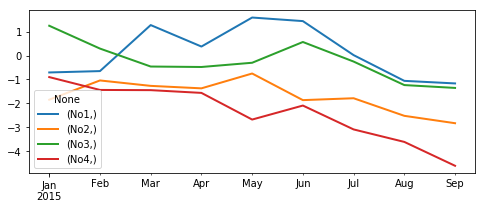

In [17]:
%matplotlib inline
df.cumsum().plot(lw=2.0, figsize=(8,3))

### <strong>02 Series 클래스
Series Class : DataFrame 의 Single Column (1차원 자료형이나 갖출건 다 갖추었음)

In [18]:
print(type(df)); df['No1'].head(2)

<class 'pandas.core.frame.DataFrame'>


,No1
2015-01-31,-0.707552
2015-02-28,0.057122


Text(0,0.5,'value')

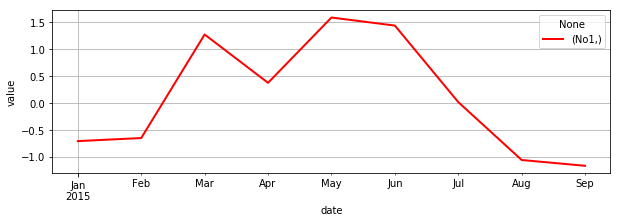

In [19]:
# Line plot of a Series object (이걸 불러오면 더 확실한 설정값을 조절 가능)
import matplotlib.pyplot as plt  
df['No1'].cumsum().plot(style='r', lw=2., grid=True, figsize = (10,3))
plt.xlabel('date'); plt.ylabel('value')

### <strong>03 GroupBy 연산
SQL의 그룹지정 및 Excel의 Pivot Table과 유사

In [20]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df.head(2)

,No1,No2,No3,No4,Quarter
2015-01-31,-0.707552,-1.846461,1.245371,-0.901338,Q1
2015-02-28,0.057122,0.804766,-0.954293,-0.537376,Q1


In [21]:
# ValueError: Grouper for 'Quarter' not 1-dimensional
# 컬럼명의 중복의 오류를 발생하여, 새롭게 재정의 하면 오류가 수정된다
df.columns = ['No1', 'No2', 'No3', 'No4', 'Quarter']
groups = df.groupby('Quarter')  # groupby 된 객체를 생성

print(groups.size(), '\n')
groups.mean()                   # groupby 객체의 .mean() 평균을 출력

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64 



,No1,No2,No3,No4
Quarter,,,,
Q1,0.424603,-0.422733,-0.153231,-0.482322
Q2,0.055313,-0.198665,0.342008,-0.214659
Q3,-0.868604,-0.321789,-0.640129,-0.839602


In [22]:
# index를 계층적 형성도 가능하다
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']
groups = df.groupby(['Quarter', 'Odd_Even'])
print(groups.size(), '\n')
groups.mean()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64 



No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      0.057122  0.804766 -0.954293 -0.537376
        Odd       0.608344 -1.036483  0.247300 -0.454795
Q2      Even     -0.523574 -0.608177  0.424354  0.235474
        Odd       1.213086  0.620360  0.177316 -1.114924
Q3      Even     -1.076236 -0.735373 -0.982956 -0.522104
        Odd      -0.764789 -0.114997 -0.468716 -0.998350

<br>
## <strong>3 금융자료
Yahoo Finance/ Google Finance

### <strong>01 코스피 지수 분석
<strong>^KS11</strong> : KOSPI Composite Index

In [23]:
from pandas_datareader import get_data_yahoo
# German DAX Index를 가져오기
DAX = get_data_yahoo('^KS11', '2000-1-1')
print(DAX.info())
DAX.tail(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4543 entries, 2000-01-04 to 2017-12-28
Data columns (total 6 columns):
Open         4437 non-null float64
High         4437 non-null float64
Low          4437 non-null float64
Close        4437 non-null float64
Adj Close    4437 non-null float64
Volume       4437 non-null float64
dtypes: float64(6)
memory usage: 248.4 KB
None


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-26,2447.669922,2457.189941,2427.340088,2427.340088,2427.340088,224600.0
2017-12-27,2420.860107,2436.679932,2411.479980,2436.669922,2436.669922,194900.0
2017-12-28,2439.310059,2467.510010,2437.260010,2467.489990,2467.489990,220300.0


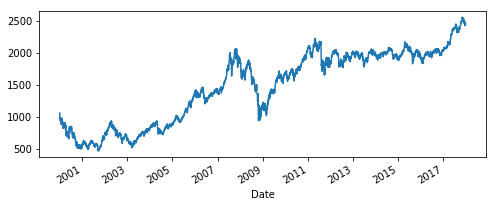

In [24]:
DAX['Close'].plot(figsize=(8,3))

CPU times: user 4.18 ms, sys: 2.29 ms, total: 6.47 ms
Wall time: 2.19 ms


,Close,Return
Date,,
2017-12-26,2427.340088,-0.005423
2017-12-27,2436.669922,0.003836
2017-12-28,2467.489990,0.012569


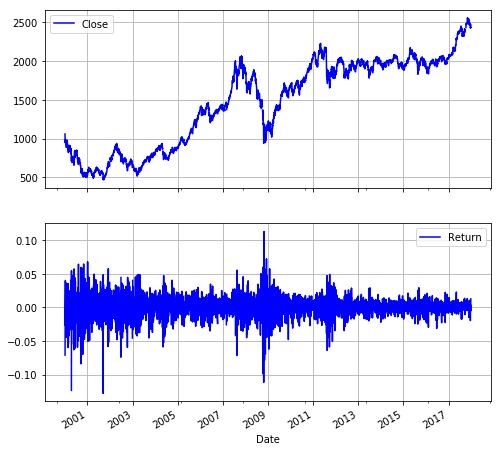

In [25]:
# Close 가격에 기반한 Log 가격변화율 계산
# .shift() : 해당 컬럼의 인덱스를 1개씩 뒤로 미룬다
%time DAX['Return'] = round( np.log(DAX['Close'] / DAX['Close'].shift(1)), 7)
DAX[['Close', 'Return']].plot(subplots=True, 
                              style='b', figsize=(8, 8), grid=True)
DAX[['Close', 'Return']].tail(3)

In [26]:
# 불필요한 column 을 삭제하는 방법
# del DAX['Adj Close']
# DAX.drop('Adj Close')

### <strong>02 이동평균선
rolling().mean()/ corr()/ max()

In [27]:
# 이동평균선을 삽입
DAX['42d'] = DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()
DAX.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Return,42d,252d
Date,,,,,,,,,
2017-12-26,2447.669922,2457.189941,2427.340088,2427.340088,2427.340088,224600.0,-0.005423,2505.954753,NaN
2017-12-27,2420.860107,2436.679932,2411.479980,2436.669922,2436.669922,194900.0,0.003836,2504.908087,NaN
2017-12-28,2439.310059,2467.510010,2437.260010,2467.489990,2467.489990,220300.0,0.012569,2504.214280,NaN


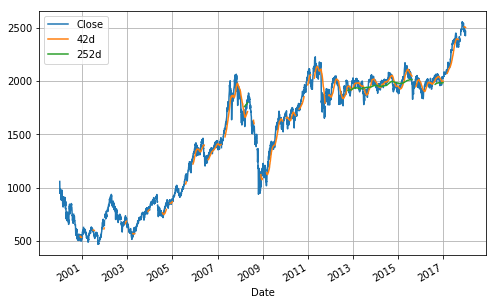

In [28]:
# title: The DAX index and moving averages
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb3444a9b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbb343adc18>], dtype=object)

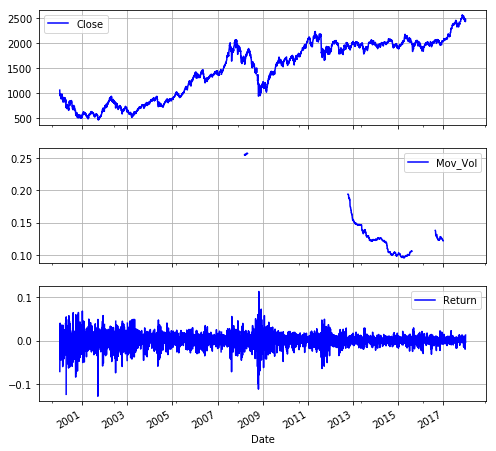

In [29]:
# 연간 이동 변동성 (The DAX index and moving, annualized volatility)
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(window=252).std() * math.sqrt(252)
DAX[['Close','Mov_Vol','Return']].plot(subplots=True, 
                                       style='b', figsize=(8,8), grid=True)

In [30]:
# 결과
# 레버리지효과의 가설을 검증가능
# 변동성 증가시 지수하락, 변동성 하락시 지수증가

<br>
## <strong>3 금융자료 회귀분석
Regression Analysis
### <strong>01 회귀분석을 위한 별도 컬럼을 생성하기
DataFrame/ Join --> to Log

,EUROSTOXX,VSTOXX
date,,
2015-12-23,3286.68,20.2504
2015-12-24,3284.47,NaN
2015-12-28,3256.49,22.4544
2015-12-29,3314.28,21.6067
2015-12-30,3287.98,22.1745


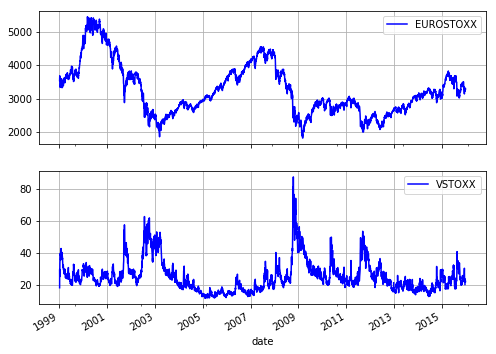

In [31]:
# 유로스톡 50 Index 와 VSTOXX 변동성 지수 추출하기
import datetime as dt
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True , sep=';', dayfirst=True)
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, dayfirst=True)

# 회귀분석을 위한 column 추출 data 만들기 (시작점 일치)
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' : vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))
data = data[data.index < '2015-12-31']                          # (마무리 기간을 일치)
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))  # 시각화
data.tail()

,EUROSTOXX,VSTOXX
date,,
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570
1999-01-11,-0.019593,0.103173


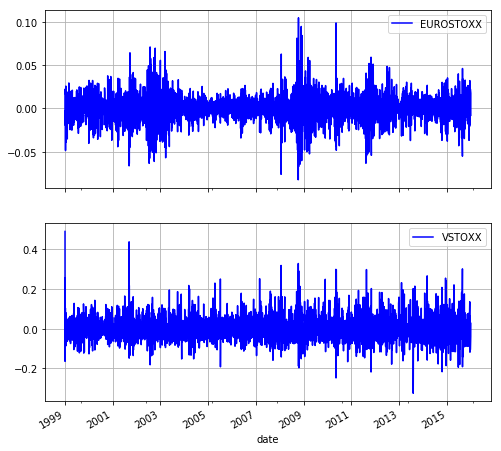

In [32]:
# data 테이블 데이터 '로그 수익률' 계산
rets = np.log(data / data.shift(1))  # Log 변동률 측정
rets.dropna(inplace=True)            # 필요없는 부분 삭제
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 8))
rets.head()

### <strong>02 회귀분석 시작
regression analysis

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.737094
VSTOXX,-0.737094,1.000000


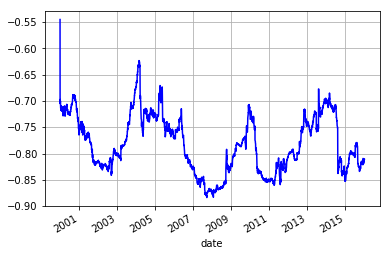

In [33]:
# log 변환율을 대상으로 '상관계수' 측정 : 일자별 상관계수 변화를 시각화  (252일 (연) 단위로 'VSTOXX'와의 상관계수를 매일 계산)
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(grid=True, style='b')
rets.corr()

In [34]:
# np.polyfit() : 오류가 가장 적은 직선의 기울기, 절편을 찾아준다
import numpy as np
xdat = rets['EUROSTOXX'].values
ydat = rets['VSTOXX'].values
reg = np.polyfit(x=xdat, y=ydat, deg=1); reg

array([ -2.83831710e+00,  -2.67365316e-04])

Text(0,0.5,'VSTOXX returns')

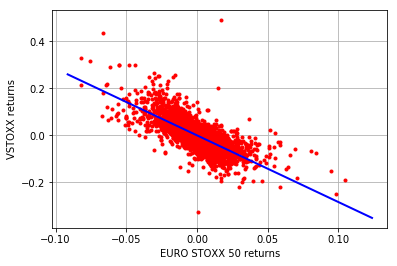

In [35]:
# np.linspace()   : 시작점과 끝점을 균일 간격으로 나눈 점들을 생성
# array.reshape() : 함수로 행과 열을 조절할 수 있다
plt.plot(xdat, ydat, 'r.')   # log 수익률의 Scatter plot과 회귀분석선 
ax = plt.axis()              # grab axis values
x  = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(reg, x), 'b', lw=2) 
plt.grid(True);                      plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns'); plt.ylabel('VSTOXX returns')

In [36]:
# 회귀식 수식을 계산 (기울기, 편차, r값 , p value 모두 측정가능)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,np.polyval(reg, x))
print(slope, intercept)

-2.83831710147 -0.000267365316386


### <strong>03 고빈도 자료 분석
High Frequency Data : Tick 데이터

In [37]:
# 필요한 모듈을 불러온다
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

NKE.shape (7406, 6) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7406 entries, 2017-12-28 02:00:01 to 2017-12-28 22:00:00
Data columns (total 6 columns):
bid        7406 non-null float64
bdepth     7406 non-null int64
bdeptht    7406 non-null int64
offer      7406 non-null float64
odepth     7406 non-null int64
odeptht    7406 non-null int64
dtypes: float64(2), int64(4)
memory usage: 725.0 KB


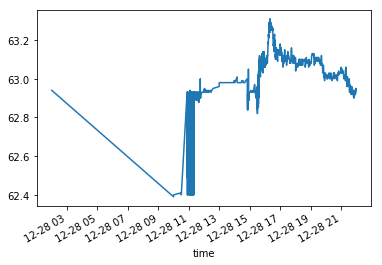

In [47]:
# 노르웨이 증권거래소에서 'NKE'의 tick 데이터를 불러온다
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2
NKE = pd.read_csv(url,index_col=0, header=0, parse_dates=True)
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
print('NKE.shape', NKE.shape, '\n')
NKE['bid'].plot()
NKE.info()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb2c7750b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fbb2c742a20>], dtype=object)

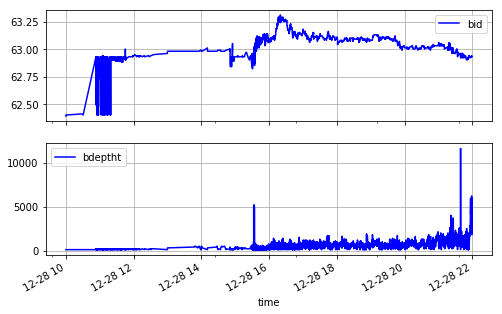

In [43]:
# 데이터 첫날부터 0시 ~ 3시 까지의 매매를 시각화
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2017, 12, 28, 10, 0))
 &  (NKE.index < dt.datetime(2017, 12, 28, 21, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)

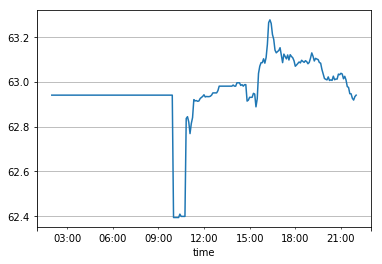

In [44]:
# Tick 데이터를 일정한 시간간격에 따라 resampleing
NKE_resam = NKE.resample(rule='5min').mean()
np.round(NKE_resam.head(), 2)
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)

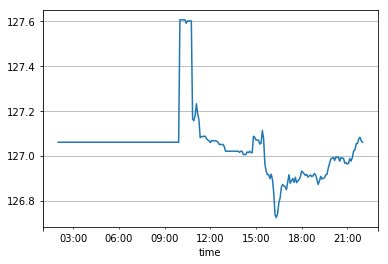

In [45]:
# test 임의 함수를 개별 데이터에 적용
# 주가의 움직음을 특정한 레벨에 대해 대칭을 시킨다
def reversal(x):
    return 2 * 95 - x

# Resampled Apple stock tick data with function applied to it
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)